In [2]:
import os
os.chdir(path="/Users/wangqiaoyu/Desktop/UW-Madion /628/Module3/data/")
str=os.getcwd()

In [190]:
#map section
import sys
import imageio
import folium
import folium.plugins as plugins
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
import numpy as np

#from mpl_toolkits.basemap import Basemap

In [166]:
import pandas as pd
PAfood = pd.read_csv('PA_business_cleaning.csv')  # read PA_business table
data=[]
#rearranging data to suit the format needed for folium
stars_list=list(PAfood['stars'].unique())
for star in stars_list:
    subset=PAfood[PAfood['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
#initialize at PA
lat = 40.36
lon = -79.97702
zoom_start=11
print("                     Pennsylvania Review heatmap Animation by stars")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=8)
hm.add_to(m)
m

                     Pennsylvania Review heatmap Animation by stars


In [167]:
PAcategory=list(PAfood["categories"])

In [168]:
PApizza=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "pizza" in s.lower():
            PApizza.append(PAfood[['latitude','longitude']].ix[i].values.tolist())


In [169]:
len(PApizza) #  number of pizza restaurant

775

In [170]:
PAchinese=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "chinese" in s.lower():
            PAchinese.append(PAfood[['latitude','longitude']].ix[i].values.tolist())       

In [171]:
len(PAchinese)  #  number of chinese restaurant

241

In [172]:
PAjapanese=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "japanese" in s.lower():
            PAjapanese.append(PAfood[['latitude','longitude']].ix[i].values.tolist())

In [173]:
len(PAjapanese)  #  number of japanese restaurant

95

In [174]:
PAMexican=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "mexican" in s.lower():
            PAMexican.append(PAfood[['latitude','longitude']].ix[i].values.tolist())

In [175]:
len(PAMexican)  #  number of mexican restaurant

190

In [176]:
PAItalian=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "italian" in s.lower():
            PAItalian.append(PAfood[['latitude','longitude']].ix[i].values.tolist())

In [177]:
len(PAItalian)      #  number of Italian restaurant

446

In [178]:
PAcoffee=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "coffee" in s.lower():
            PAcoffee.append(PAfood[['latitude','longitude']].ix[i].values.tolist())

In [179]:
len(PAcoffee)    #  number of coffee restaurant

419

In [180]:
PAbars=list()
for i in range(len(PAcategory)):
    s=PAcategory[i]
    if type(s)==str:
        if "bars" in s.lower():
            PAbars.append(PAfood[['latitude','longitude']].ix[i].values.tolist())

In [181]:
len(PAbars)    #  number of bars

932

In [223]:
data=[PApizza,PAchinese,PAjapanese,PAMexican,PAItalian,PAcoffee,PAbars]
#initialize at PA
lat = 40.36
lon = -79.97702
zoom_start=11
print("                     Pennsylvania Review heatmap Animation by categories ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=8)
hm.add_to(m)
m

                     Pennsylvania Review heatmap Animation by categories 


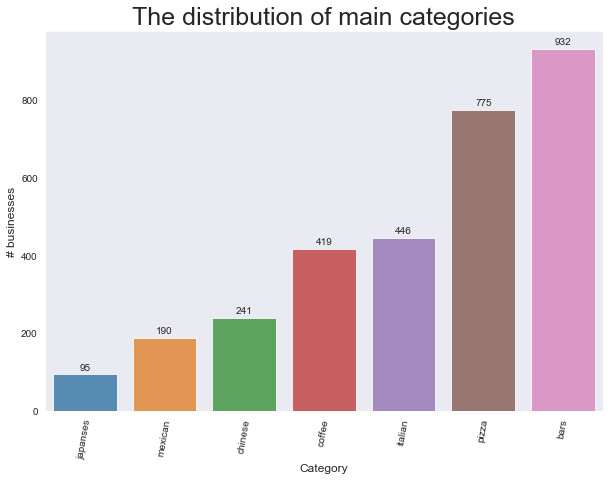

In [222]:
dicti=({'bars':len(PAbars),'pizza':len(PApizza),'italian':len(PAItalian),'coffee':len(PAcoffee),'chinese':len(PAchinese),'mexican':len(PAMexican),'japanses' : len(PAjapanese)   })
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Dim","Count"]
pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)
plt.figure(figsize=(10,7))
sns.set_style("dark")
ax = sns.barplot(pd_df.Dim, pd_df.Count, alpha=0.8) #,color=color[5])
plt.title("The distribution of main categories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = pd_df.Count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()